# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
  
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
import numpy as np
import cv2
option = 0

if option == 1: #write
    print(type(X_train), X_train.shape)
    print(type(X_test), X_test.shape)
    lenX_train = X_train.shape[0] 
    lenX_test = X_test.shape[0]

    processed_X_train = np.zeros((1, 32, 32, 1))
    processed_X_test = np.zeros((1, 32, 32, 1))

    print("starting...")
    for i in range(lenX_train):
        X_train_gray = cv2.cvtColor(X_train[i], cv2.COLOR_BGR2GRAY)
        X_train_gray = X_train_gray.reshape(1, 32, 32, 1).astype(np.float32)
        processed_X_train = np.concatenate((processed_X_train, X_train_gray), axis = 0)
        if i%1000 == 0:
            print (i)
            print(type(processed_X_train), processed_X_train.shape)
    print("writing...")       
    f_train = open('train_gray.p', 'wb')
    pickle.dump(processed_X_train, f_train, pickle.HIGHEST_PROTOCOL)
    f_train.close()
    print("done.")   

    print("starting...")
    for i in range(lenX_test):
        X_test_gray = cv2.cvtColor(X_test[i], cv2.COLOR_BGR2GRAY) #32x32 grayscale
        X_test_gray = X_test_gray.reshape(1, 32, 32, 1).astype(np.float32)
        processed_X_test = np.concatenate((processed_X_test, X_test_gray), axis = 0)
        if i%1000 == 0:
            print (i)
            print(type(processed_X_test), processed_X_test.shape)
    print("writing...") 
    f_test = open('test_gray.p', 'wb')
    pickle.dump(processed_X_test, f_test, pickle.HIGHEST_PROTOCOL)
    f_test.close()
    print("done.") 
    
if option == 0: #read
    training_gray_file = 'train_gray.p'
    test_gray_file = 'test_gray.p'
    
    with open(training_gray_file, mode='rb') as f1:
        train = pickle.load(f1)
    
    with open(test_gray_file, mode='rb') as f2:
        test = pickle.load(f2)
        
    processed_X_train = train
    processed_X_test = test
    
    print(type(X_train),X_train.shape)
    print(type(X_test),X_test.shape)
    
    print(type(processed_X_train), processed_X_train.shape)
    print(type(processed_X_test), processed_X_test.shape)

<class 'numpy.ndarray'> (39209, 32, 32, 3)
<class 'numpy.ndarray'> (12630, 32, 32, 3)
<class 'numpy.ndarray'> (39210, 32, 32, 1)
<class 'numpy.ndarray'> (12631, 32, 32, 1)


In [3]:
X_train = processed_X_train
X_test = processed_X_test

X_train = np.delete(X_train, 0, 0)
X_test = np.delete(X_test, 0, 0)

print(type(X_train), X_train.shape)
print(type(X_test), X_test.shape)

<class 'numpy.ndarray'> (39209, 32, 32, 1)
<class 'numpy.ndarray'> (12630, 32, 32, 1)


### Data Visualization

12631
12630
12630
19


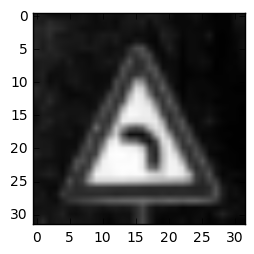

In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print(len(processed_X_test))
print(len(X_test))
print(len(y_test))

index = random.randint(0, len(processed_X_test))
image = X_test[index].squeeze()

#plt.figure(figsize=(1,1))
plt.subplot(121), plt.imshow(image, cmap="gray")

print(y_test[index])

### Image Augmentation

<class 'numpy.ndarray'> (39209, 32, 32, 1)
<class 'numpy.ndarray'> (73557, 32, 32, 1)


(<matplotlib.axes._subplots.AxesSubplot at 0x7fe3f77ad2e8>,
 (array([ 1260.,  2220.,  2250.,  1410.,  1980.,  1860.,  2100.,  1440.,
          1410.,  1470.,  2010.,  1320.,  2100.,  2160.,   780.,  1890.,
          2100.,  1110.,  1200.,  1260.,  2160.,  1980.,  1950.,  2040.,
          1620.,  1500.,  1800.,  1440.,  2160.,  1620.,  2250.,   780.,
          1440.,  2067.,  2100.,  1200.,  1950.,  1260.,  2070.,  1800.,
          2160.,  1440.,  1440.]),
  array([  0.        ,   0.97674419,   1.95348837,   2.93023256,
           3.90697674,   4.88372093,   5.86046512,   6.8372093 ,
           7.81395349,   8.79069767,   9.76744186,  10.74418605,
          11.72093023,  12.69767442,  13.6744186 ,  14.65116279,
          15.62790698,  16.60465116,  17.58139535,  18.55813953,
          19.53488372,  20.51162791,  21.48837209,  22.46511628,
          23.44186047,  24.41860465,  25.39534884,  26.37209302,
          27.34883721,  28.3255814 ,  29.30232558,  30.27906977,
          31.2558139

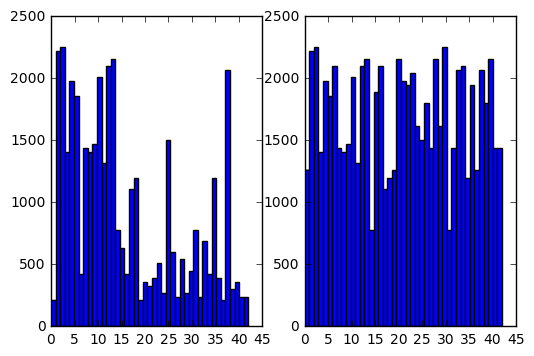

In [5]:
from sklearn.utils import shuffle
import cv2

### Preprocess the data here.
### Feel free to use as many code cells as needed.
import cv2
import scipy.ndimage

print(type(X_train),X_train.shape)
plt.subplot(121), plt.hist(y_train, bins=43)

image_shape = X_train[0].shape
inputs_per_class = np.bincount(y_train)
max_inputs = np.max(inputs_per_class)

angles = [-10, 10, -15, 15, -20, 20]

for i in range(len(inputs_per_class)):
    input_ratio = min(int(max_inputs / inputs_per_class[i]) - 1, len(angles) - 1)

    if input_ratio <= 1:
        continue

    new_features = []
    new_labels = []
    mask = np.where(y_train == i)

    for j in range(input_ratio):
        for feature in X_train[mask]:
            new_features.append(scipy.ndimage.rotate(feature, angles[j], reshape=False))
            new_labels.append(i)

    X_train = np.append(X_train, new_features, axis=0)
    y_train = np.append(y_train, new_labels, axis=0)

print(type(X_train),X_train.shape)
plt.subplot(122), plt.hist(y_train, bins=43)

### Validation Test Split

In [6]:
import sklearn.model_selection
from sklearn.model_selection import train_test_split
#%20 percent of training set will splited to validation set

X_train, X_validation, y_train, y_validation = sklearn.model_selection.train_test_split(X_train, y_train, test_size=0.2, random_state=0)

print(type(X_train),X_train.shape)
print(type(X_validation),X_validation.shape)

<class 'numpy.ndarray'> (58845, 32, 32, 1)
<class 'numpy.ndarray'> (14712, 32, 32, 1)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [7]:
### Replace each question mark with the appropriate value.

# Number of training examples
n_train = X_train.shape[0]

# Number of validation examples.
n_valid = X_validation.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 58845
Number of validation examples = 14712
Number of testing examples = 12630
Image data shape = (32, 32, 1)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [8]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
import numpy as np
# Visualizations will be shown in the notebook.
%matplotlib inline

def imshow_by_class(X,y,class_number):
    no_samples=[]
    labels=set(y)
    for label in labels:
        idx=np.nonzero((y)==label)
        no_samples.append(idx[0].shape[0])
        if label==class_number:
            image=X[idx[0][0]]
            plt.imshow(image)
    return X,image, idx

def imshow_by_idx(X,y,idx):
    labels=set(y)
    for label in labels:
        #idx=np.nonzero((y)==label)
        if label==class_number:
            image=X[idx[0][0]]
    return image
    
class_number=4
#X,image, idx=imshow_by_class(X_train,y_train,class_number)

#image2=imshow_by_idx(X_train,y_train,idx)

#plt.subplot(121),plt.imshow(X[idx[0][0]])
#plt.subplot(122),plt.imshow(image)

#plt.imshow(image)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Preprocess

In [9]:
def preprocess_for_nn(data):
    data /= 255
    data -= np.mean(data)
    data /= np.std(data)
    num_channels=1
    return data.reshape(-1, image_shape[0], image_shape[1], num_channels).astype(np.float32)

def brightness_equilization(img):
    hist,bins = np.histogram(img.flatten(),256,[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()
    cdf_m = np.ma.masked_equal(cdf,0)
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    cdf = np.ma.filled(cdf_m,0).astype('uint8')
    return cdf[img]

#X_train = brightness_equilization(X_train)
X_train = preprocess_for_nn(X_train)

#X_validation = brightness_equilization(X_validation)
X_validation = preprocess_for_nn(X_validation)

#X_test = brightness_equilization(X_test)
X_test = preprocess_for_nn(X_test)

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples.
n_valid = X_validation.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 58845
Number of validation examples = 14712
Number of testing examples = 12630
Image data shape = (32, 32, 1)
Number of classes = 43


In [10]:
print(max(X_train[0][0]))
print(min(X_train[0][0]))

[ 2.69955468]
[-1.15283525]


### Hyperparameters

In [11]:
import tensorflow as tf

# Hyperparameters
EPOCHS = 30
BATCH_SIZE = 128
mu = 0
sigma = 0.1
keep_prop=0.5
rate=0.001
beta = 1e-4

### Model Architecture

In [12]:
from tensorflow.contrib.layers import flatten

graph=tf.Graph()

with graph.as_default():
    
    # Placeholders
    x = tf.placeholder(tf.float32, (None, 32, 32, 1))
    y = tf.placeholder(tf.int32, (None))
    one_hot_y = tf.one_hot(y, 43)
    
    # Layer 0: Convolutional. Input = 32x32x1. Output = 32x32x8.
    conv0_W = tf.Variable(tf.truncated_normal(shape=(1, 1, 1, 8), mean = mu, stddev = sigma), name='conv0_W')
    conv0_b = tf.Variable(tf.zeros(8), name='conv0_b')
    conv0   = tf.nn.conv2d(x, conv0_W, strides=[1, 1, 1, 1], padding='VALID') + conv0_b

    # Activation.
    conv0 = tf.nn.relu(conv0)
    
    # Layer 1: Convolutional. Input = 32x32x8. Output = 28x28x16.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 8, 16), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(16))
    conv1   = tf.nn.conv2d(conv0, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x16. Output = 14x14x16.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Dropout
    conv1=tf.nn.dropout(conv1, keep_prop) 

    # Layer 2: Convolutional. Output = 10x10x32.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 32), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(32))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x32. Output = 5x5x32.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Dropout
    conv2=tf.nn.dropout(conv2, keep_prop)

    # Flatten. Input = 5x5x32. Output = 800.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 800. Output = 1024.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(800, 1024), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(1024))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)
    
    # Dropout
    fc1=tf.nn.dropout(fc1, keep_prop)

    # Layer 4: Fully Connected. Input = 1024. Output = 1024.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(1024, 1024), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(1024))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)
    
    # Dropout
    fc2=tf.nn.dropout(fc2, keep_prop)
    
    # Layer 5: Fully Connected. Input = 1024. Output = 1024.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(1024, 1024), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(1024))
    fc3    = tf.matmul(fc2, fc3_W) + fc3_b
    
    # Activation.
    fc3    = tf.nn.relu(fc3)
    
    # Dropout
    fc3=tf.nn.dropout(fc3, keep_prop)

    # Layer 6: Fully Connected. Input = 1024. Output = 43.
    fc4_W  = tf.Variable(tf.truncated_normal(shape=(1024, 43), mean = mu, stddev = sigma))
    fc4_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc3, fc4_W) + fc4_b
    
    softmax_probs = tf.nn.softmax(logits)
    predicted_labels = tf.argmax(logits,1)
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
    loss = tf.reduce_mean(cross_entropy) + beta * (tf.nn.l2_loss(conv0_W) + tf.nn.l2_loss(conv1_W) + tf.nn.l2_loss(conv2_W) + tf.nn.l2_loss(fc1_W) + tf.nn.l2_loss(fc2_W) + tf.nn.l2_loss(fc3_W) + tf.nn.l2_loss(fc4_W))    
    optimizer = tf.train.AdamOptimizer(learning_rate = rate)
    train = optimizer.minimize(loss)
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [13]:
session = tf.Session(graph = graph)
_ = session.run([init])

#save_file = 'trained_tsr_model_v1.ckpt'
#saver = tf.train.Saver()

print("Training...")
print()

for i in range(EPOCHS):
    X_train, y_train = shuffle(X_train, y_train)
    num_examples = len(X_train)
    total_accuracy = 0
    total_loss = 0
    for offset in range(0, num_examples, BATCH_SIZE):
        end = offset + BATCH_SIZE
        batch_x, batch_y = X_train[offset:end], y_train[offset:end]
        accuracy_value, _, loss_value = session.run([accuracy, train, loss], feed_dict={x: batch_x, y: batch_y})
        
        total_accuracy += (accuracy_value * len(batch_x))
        total_loss += (loss_value  * len(batch_x))
    
    total_accuracy = total_accuracy / num_examples
    total_loss = total_loss / num_examples
    
    print("EPOCH {} ...".format(i+1))
    print("Validation Accuracy = {:.3f}".format(total_accuracy))
    print("Loss: ", total_loss)
    print()
    
#saver.save(sess, save_file)
#print('Trained model saved.')

Training...

EPOCH 1 ...
Validation Accuracy = 0.043
Loss:  5.17626239113

EPOCH 2 ...
Validation Accuracy = 0.133
Loss:  4.12394189448

EPOCH 3 ...
Validation Accuracy = 0.290
Loss:  3.29750746123

EPOCH 4 ...
Validation Accuracy = 0.470
Loss:  2.61110732682

EPOCH 5 ...
Validation Accuracy = 0.590
Loss:  2.13844396087

EPOCH 6 ...
Validation Accuracy = 0.661
Loss:  1.83774526464

EPOCH 7 ...
Validation Accuracy = 0.705
Loss:  1.62343722443

EPOCH 8 ...
Validation Accuracy = 0.744
Loss:  1.44965980118

EPOCH 9 ...
Validation Accuracy = 0.776
Loss:  1.29684755212

EPOCH 10 ...
Validation Accuracy = 0.797
Loss:  1.18448575535

EPOCH 11 ...
Validation Accuracy = 0.821
Loss:  1.07585737217

EPOCH 12 ...
Validation Accuracy = 0.838
Loss:  0.991478846511

EPOCH 13 ...
Validation Accuracy = 0.854
Loss:  0.917102696476

EPOCH 14 ...
Validation Accuracy = 0.864
Loss:  0.863502616161

EPOCH 15 ...
Validation Accuracy = 0.874
Loss:  0.820687853904

EPOCH 16 ...
Validation Accuracy = 0.879
Loss: 

### Test

In [14]:
num_examples = len(X_test)
total_test_accuracy = 0
total_test_loss = 0

for offset in range(0, num_examples, BATCH_SIZE):
    end = offset + BATCH_SIZE
    batch_x, batch_y = X_test[offset:end], y_test[offset:end]
    test_accuracy_value, _, test_loss_value = session.run([accuracy, train, loss], feed_dict={x: batch_x, y: batch_y})
        
    total_test_accuracy += (test_accuracy_value * len(batch_x))
    total_test_loss += (test_loss_value  * len(batch_x))
    
total_test_accuracy = total_test_accuracy / num_examples
total_test_loss = total_test_loss / num_examples

print("Test Accuracy = {:.3f}".format(total_test_accuracy))
print("Test Loss = {:.3f}".format(total_test_loss))

Test Accuracy = 0.858
Test Loss = 0.811


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

I augmented training dataset due underrepresented traffic sign classes at first. By rotating images in a couple of
different angles both dataset has been increased and test accuracy has been increased a bit.

Dataset also converted to grayscale images, zero-centered and normalized

Lastly, brightness equilization has been applied. Histogram normalization used for to compensate low illuminated
traffic signs to better recognized.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

validation data has been splitted from training set as to be %20 and %80 accordingly.
additional data is generated by image augmentation and underrepresented images rotated to have more images. 

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

CNN Architecture:
    
    Convolution by 1x1x8
    ReLu
-------------------
    Convolution by 5x5x16
    ReLu
    Max Pooling
    Dropout
-------------------
    Convolution by 5x5x32
    ReLu
    Max Pooling
    Dropout
    Flatten (800)
-------------------
    Fully Connected Layer (1024)
    ReLu
    Dropout
-------------------
    Fully Connected Layer (1024)
    ReLu
    Dropout
-------------------
    Fully Connected Layer (43)
    Softmax
-------------------

to avoid overfitting l2 regularization and dropout methods are applied also. The other thing that could be useful to implement is batch-normalization. According to its benefits like avoiding 'died' neurons and availability to use higher learning rates I think it will be worth to try out for do more.


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

AdamOptimizer has been used

Batch size: 128

Epochs: 30 (100 also tried but not that much difference between 30)

Beta for L2 regularization: 1e-04


learning rate: 0.001 (higher and lower learning rates tried and 0.001 found as to give best result. Learning rate decay also tried and training duration has been reduced a bit and decay rate seemed as an important parameter to tune as well.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I tried many different network sizes and dimensions for both convolutional layers and fc layers. Simply doesn't changed anything a lot even though I increased number of layer of its dimensions. So I choose to increase depth of convolutions and number of fc layers due dramatic differences between signs both in color and shape. As an observation, dimension increments changes computing duration a lot.

For hyperparameter tunnings, I started from values already recommended and search between these values if I could get better but doesn't find any other value that I can share.

Dataset variance is seemed very important to have better training and augmentation techniques are important. Datasets couldn't cover all angle and brightness variances so augmentation is powerful to close the gap of datasets. So further improvements will be focused in this area. 

Overfitting avoidance methods are also affect difference between training and test accuracy results a lot. After implementation of L2 regularization and dropout the gap between them reduced to %9. Batch normalization will be studied more and tried to implement.

Lastly, post-processing definitions should be implemented also. Confusion matrix will be helpful to see which signs are recognized worse than others.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [15]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import matplotlib.image as mpimg
    
imgs = ['60.png', 'forbid.png', 'hochwasser.png', 'priority.png', '28_children.png', '33_right.png', 'bumpy.png', 'right.png']

new_inputs = []
processed_images = []
processed_new_images = []

for imgname in imgs:
    image = mpimg.imread('images/' + imgname)
    image = image.astype(np.float32)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, (image_shape[0], image_shape[1])) # Resize image
    new_inputs.append(gray)

print(type(new_inputs), len(new_inputs))

for image1 in new_inputs:
        image1 /= 255
        image1 -= np.mean(image1)
        image1 /= np.std(image1)
        processed_images.append(image1)
        
print(type(processed_images), len(processed_images))

processed_new_images = np.array(processed_images)
processed_new_images = processed_new_images.reshape(-1, image_shape[0], image_shape[1], 1).astype(np.float32)

print(type(processed_new_images), processed_new_images.shape)

<class 'list'> 8
<class 'list'> 8
<class 'numpy.ndarray'> (8, 32, 32, 1)


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [16]:
X_collected = processed_new_images
y_collected_true = np.array([3, 9, 17, 12, 28, 33, 22, 36])

pred = session.run([predicted_labels], feed_dict={x: X_collected})[0]

topFive = session.run(tf.nn.top_k(softmax_probs, 5), feed_dict={x: X_collected})
values_topFive = topFive[0]
indices_topFive = topFive[1]

print(y_collected_true)
print(pred)

[ 3  9 17 12 28 33 22 36]
[ 1  9 13 40 28 33 22 36]


In [17]:
values_topFive[0]

array([ 0.43228909,  0.14691539,  0.10490686,  0.06727584,  0.05077663], dtype=float32)

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

[ 0.43228909  0.14691539  0.10490686  0.06727584  0.05077663]


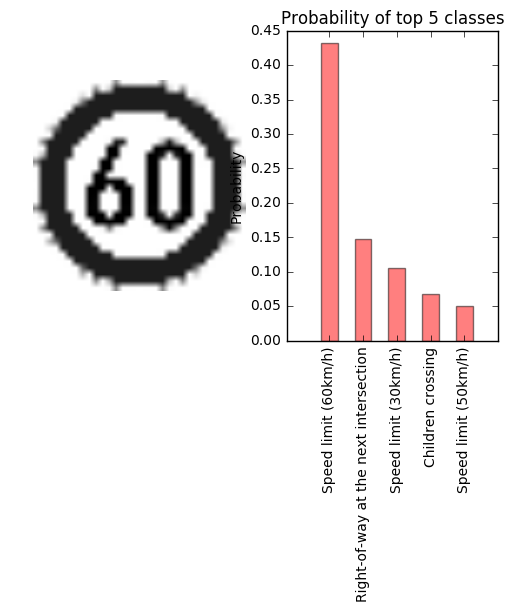

[  1.00000000e+00   3.27750982e-08   2.31527308e-14   5.53020775e-20
   2.89948311e-24]


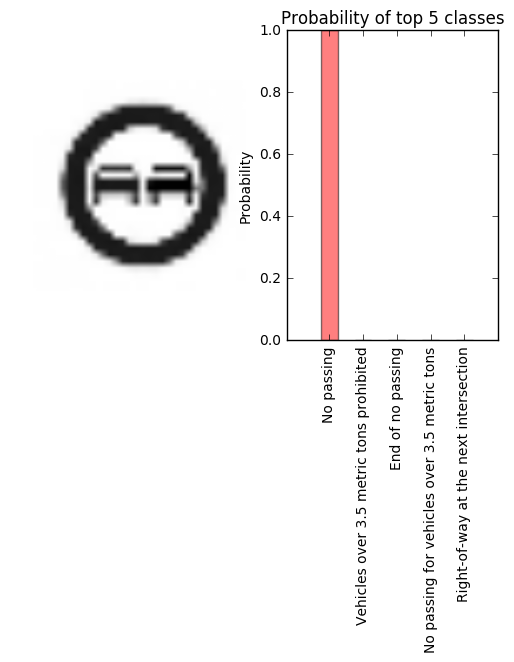

[  9.99614716e-01   3.77867778e-04   7.39089364e-06   2.06518084e-11
   1.47685584e-15]


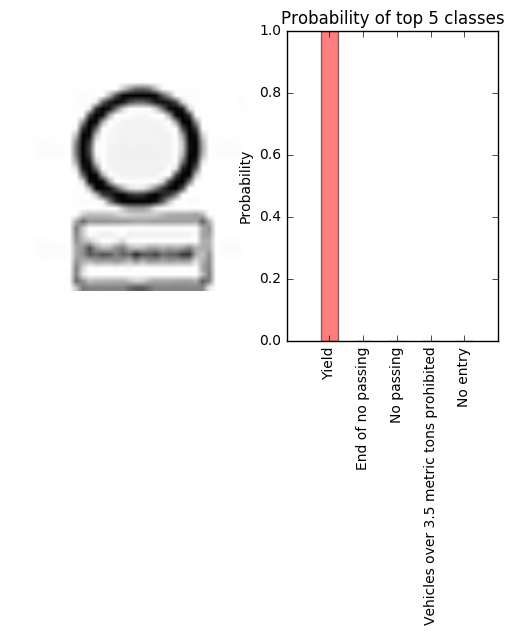

[ 0.23210587  0.19084397  0.09097994  0.06912514  0.06640548]


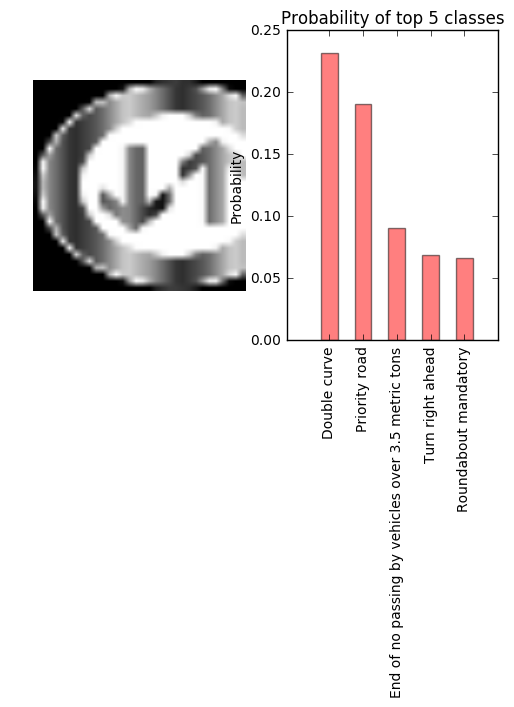

[ 0.94629949  0.01888685  0.01802866  0.00766715  0.00148563]


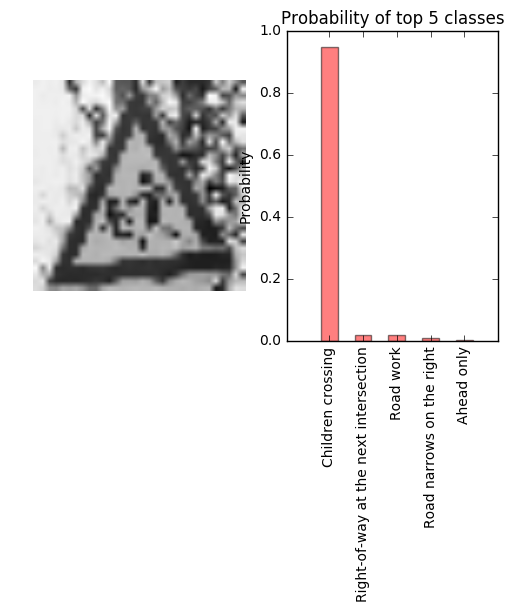

[  9.92636144e-01   3.07034422e-03   2.78153201e-03   5.27032942e-04
   2.37466302e-04]


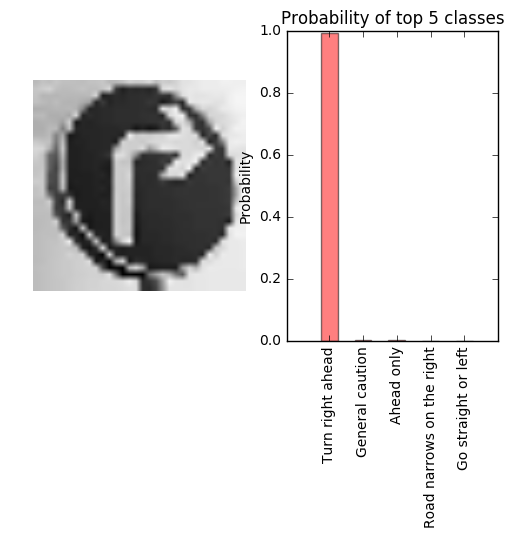

[  8.93227637e-01   1.02856696e-01   3.91542213e-03   1.07479480e-07
   8.79002329e-08]


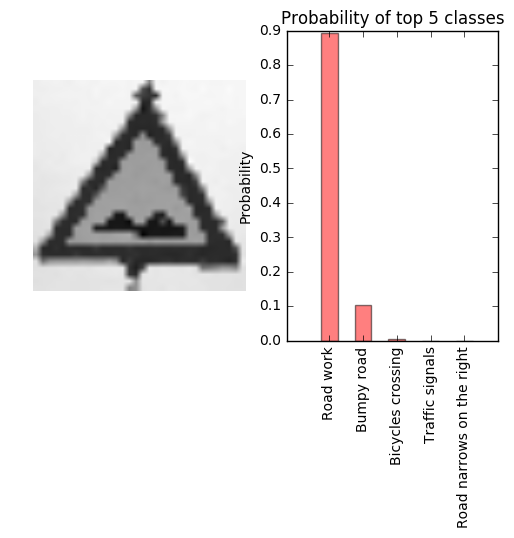

[  9.93049145e-01   5.80211263e-03   7.63095217e-04   1.34639922e-04
   1.29271953e-04]


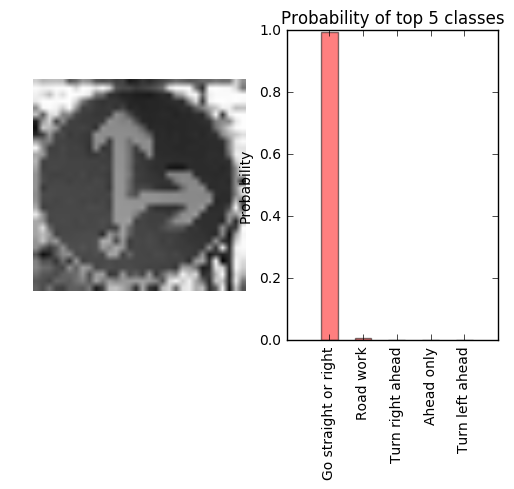

In [18]:
0### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

import pandas as pd

sign_names = pd.read_csv('signnames.csv')

def get_sign_name(class_index):
    row = sign_names[sign_names.ClassId == int(class_index)]
    return row.SignName.values[0]

def get_sign_names(indices):
    return [get_sign_name(index) for index in indices]

for i in range(len(new_inputs)):
    
    # Plot the original image
    plt.subplot(121)
    image=new_inputs[i]
    image = cv2.resize(image, (image_shape[0], image_shape[1])) 
    #plt.subplot(4, 2,1+i)
    plt.axis('off')
    plt.imshow(image, cmap="gray")
    
    # Get the top k probabilities and the classes to which they correspond
    indices = indices_topFive
    values = values_topFive
    
    # Sort in ascending order
    #idx = values.argsort()
    #values = values[idx]
    #indices = indices[idx]
    #print(values[0][i])
    # Show a bar chart of the probabilities
    y_pos = range(0, 200, 40)
    
    print(values[i])
    plt.subplot(122)
    plt.bar(y_pos, values[i], align='center', alpha=0.5, color='red', width=20)
    plt.xticks(y_pos, get_sign_names(indices[i]))
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90)

    plt.ylabel('Probability')
    plt.title('Probability of top 5 classes')
    plt.show()

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

5 correct prediction out of 8 is achieved (%62.5). For 2 incorrect predictions, the correct answer is on the second guess and for the third one the correct answer is at 5th. There is approximately %20 prediction error gap between test accuracy and the accuracy gathered from externally given images. This error could be caused due there is no proper traffic sign detection on external images and image sizes/resolution are vary between these images.